DA-Project for training purposses
Use of Steam Games Dataset from Kaggle
https://www.kaggle.com/datasets/fronkongames/steam-games-dataset?resource=download


Loading the DataSet games.csv from the folder sgd_data with Python

In [2]:
#Importing the necessary libraries
import pandas as pd             # pandas for data frame
import numpy as np              # numpy for array

import matplotlib.pyplot as plt # for plotting
# Will allow us to embed images in the notebook
%matplotlib inline
from matplotlib.cbook import _reshape_2D

# Seaborn visualization library
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
import seaborn as sns

For the SQL - Parts

In [3]:
#For the SQL - Part
# Import the get_engine function from our sql_functions.
from sql_functions import get_engine #adjust this as necessary to match your sql_functions.py connection methods

# Import get_dataframe from sql_functions.py
from sql_functions import get_dataframe

# create a variable called engine using the get_engine function
engine = get_engine()

we create empty dataframes

In [4]:
# create an empty dataframe
df = pd.DataFrame()
games = pd.DataFrame()

In [5]:
#Loading the DataSet games.csv from the folder sgd_data with Python Pandas
# The games.csv file is in the sgd_data folder
# The file is to large for the Upload to GitHub, so you have to download it from the following link:
# https://www.kaggle.com/datasets/fronkongames/steam-games-dataset?resource=download

games = pd.read_csv('sgd_data/games.csv')

In [6]:
# Load the CSV file into a DataFrame as a copy
df = games

We want to see everything

In [7]:
# Set the option to prevent truncation of column names
pd.set_option('display.max_columns', None)

# Reset the option to its default value
#pd.reset_option('display.max_columns')

-----

# Lets try to get rid of some unnecessary stuff (for DA) and then do some analysis

In [8]:
# Display the information of the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76987 entries, 0 to 76986
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       76987 non-null  int64  
 1   Name                        76985 non-null  object 
 2   Release date                76987 non-null  object 
 3   Estimated owners            76987 non-null  object 
 4   Peak CCU                    76987 non-null  int64  
 5   Required age                76987 non-null  int64  
 6   Price                       76987 non-null  float64
 7   DLC count                   76987 non-null  int64  
 8   About the game              74070 non-null  object 
 9   Supported languages         76987 non-null  object 
 10  Full audio languages        76987 non-null  object 
 11  Reviews                     9362 non-null   object 
 12  Header image                76987 non-null  object 
 13  Website                     366

None

In [9]:
# Create a new DataFrame with column names
column_names_df = pd.DataFrame({'Column Names': df.columns})

# Display the new DataFrame
display(column_names_df)

,Column Names
0,AppID
1,Name
2,Release date
3,Estimated owners
4,Peak CCU
5,Required age
6,Price
7,DLC count
8,About the game
9,Supported languages


------ 

# We will now check for missing values

In [10]:
# Check for missing values
display(df.isnull().sum())

AppID                             0
Name                              2
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2917
Supported languages               0
Full audio languages              0
Reviews                       67625
Header image                      0
Website                       40308
Support url                   38759
Support email                 12090
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                73195
User score                        0
Positive                          0
Negative                          0
Score rank                    76945
Achievements                      0
Recommendations                   0
Notes                       

In [11]:
# Check for missing values
missing_values = df.isnull()

# Count the number of missing values in each column
missing_counts = missing_values.sum()

print("Missing value counts for each column:")
display(missing_counts)

Missing value counts for each column:


AppID                             0
Name                              2
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 2917
Supported languages               0
Full audio languages              0
Reviews                       67625
Header image                      0
Website                       40308
Support url                   38759
Support email                 12090
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                73195
User score                        0
Positive                          0
Negative                          0
Score rank                    76945
Achievements                      0
Recommendations                   0
Notes                       

### We will plot a graph with the missing values for visualisation

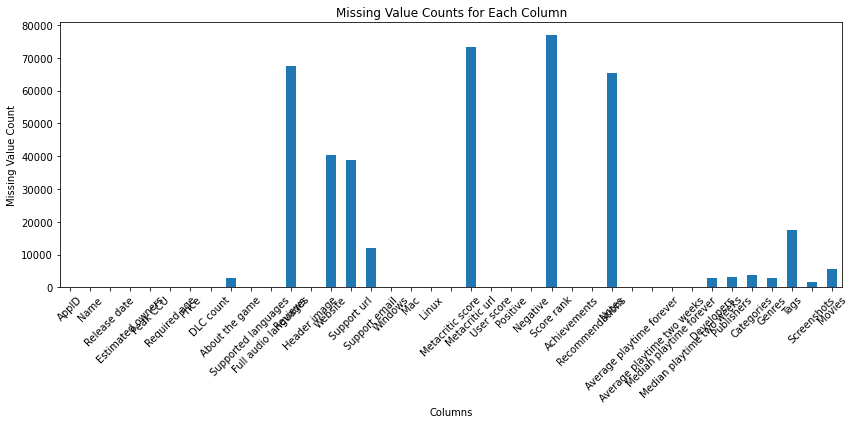

In [12]:
# Plot missing value counts
plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Counts for Each Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### oh man, this is crowded. Lets try one with only the missing values

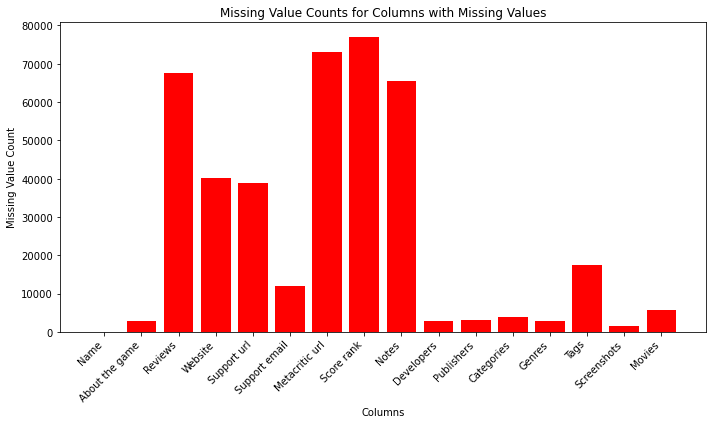

In [13]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_counts[missing_counts > 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for missing values
plt.bar(missing_columns.index, missing_columns.values, color='red')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Counts for Columns with Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


we can see "Name" on this graph. It has two missing values

In [14]:
# Check for duplicated rows
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [15]:
# Get numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Check for negative values in numeric columns
negative_values = {}
for column in numeric_columns:
    negative_values[column] = df[df[column] < 0]

print("Columns with negative values:")
for column, negative_rows in negative_values.items():
    if not negative_rows.empty:
        print(f"Column: {column}")
        print(negative_rows)
        print("=" * 50)

Columns with negative values:


In [16]:
# Display the first few rows of the DataFrame
#print(df.head())
display(df.head(3))
display(df.tail(3))

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
76984,2503930,Surreal House Playtest,"Aug 1, 2023",0 - 0,0,0,0.00,0,NaN,[],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76985,2524860,Spot the Object,"Aug 4, 2023",0 - 20000,0,0,3.99,0,Welcome to the captivating world of 'Spot the ...,['English'],['English'],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,info@zenvision.co.za,True,False,False,0,NaN,0,2,1,NaN,8,0,NaN,0,0,0,0,ZenVision Games,ZenVision Games,"Single-player,Steam Achievements","Casual,Indie,Simulation,Strategy","Casual,Simulation,Strategy,Point & Click,Puzzl...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
76986,2431960,擱淺地 - Dream Antique,"Aug 2, 2023",0 - 0,0,0,0.00,0,「拼湊夢想的碎片，尋回最初的夢想」 請跟隨思彤的腳步與他人相遇並在擱淺地中一步步解開真相吧 ...,['Traditional Chinese'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://duyoushan1.wixsite.com/dream-antique,NaN,huayi1128@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,擱淺地 - Dream Antique,擱淺地 - Dream Antique,Single-player,"Casual,Free to Play,Indie,RPG",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


-----

# This should give us a good baseline for our Data - Cleaning Process

we will start with normalizing headers

In [17]:
# before
games.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [18]:
# Normalize column headers
df.columns = df.columns.str.lower()  # Convert to lowercase
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
df.columns = df.columns.str.replace('[^\w\s]', '')  # Remove special characters

print("Normalized column headers:")
print(df.columns)

Normalized column headers:
Index(['appid', 'name', 'release_date', 'estimated_owners', 'peak_ccu',
       'required_age', 'price', 'dlc_count', 'about_the_game',
       'supported_languages', 'full_audio_languages', 'reviews',
       'header_image', 'website', 'support_url', 'support_email', 'windows',
       'mac', 'linux', 'metacritic_score', 'metacritic_url', 'user_score',
       'positive', 'negative', 'score_rank', 'achievements', 'recommendations',
       'notes', 'average_playtime_forever', 'average_playtime_two_weeks',
       'median_playtime_forever', 'median_playtime_two_weeks', 'developers',
       'publishers', 'categories', 'genres', 'tags', 'screenshots', 'movies'],
      dtype='object')


/var/folders/yg/z64xf8615mxbsw25_zldzjnm0000gn/T/ipykernel_3415/773374837.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^\w\s]', '')  # Remove special characters


nothing fancy happend, the dataset was well prepared in Kaggle

In [19]:
# Convert 'Release date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

print("DataFrame with 'Release date' in datetime format:")
display(df.head())

DataFrame with 'Release date' in datetime format:


,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,about_the_game,supported_languages,full_audio_languages,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,user_score,positive,negative,score_rank,achievements,recommendations,notes,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks,developers,publishers,categories,genres,tags,screenshots,movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [20]:
# Choose a specific numeric column (e.g., 'Price') to check for outliers
column_name = 'price'

# Calculate the first and third quartiles
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("Potential outliers:")
display(outliers)

Potential outliers:


,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,about_the_game,supported_languages,full_audio_languages,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,user_score,positive,negative,score_rank,achievements,recommendations,notes,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks,developers,publishers,categories,genres,tags,screenshots,movies
10,1026420,WARSAW,2019-10-02,20000 - 50000,5,0,23.99,0,Use everything at your disposal to help a team...,"['English', 'French', 'German', 'Polish', 'Rus...",[],“New WW2 Strategy Game Offers A Harrowing Look...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://warsawthegame.com,NaN,contact@pixmilk.com,True,False,False,62,https://www.metacritic.com/game/pc/warsaw?ftag...,0,589,212,NaN,34,427,NaN,67,0,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
22,434030,Aerofly FS 2 Flight Simulator,2017-11-20,100000 - 200000,19,0,37.49,23,Aerofly FS 2 lets you explore the world of fly...,"['English', 'German', 'French']","['English', 'German', 'French']",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.aerofly.com/,https://www.aerofly.com/support,NaN,True,True,True,0,NaN,0,1490,408,NaN,0,1831,NaN,127,0,127,0,IPACS,IPACS,"Single-player,Partial Controller Support","Action,Indie,Racing,Simulation","Flight,Simulation,VR,Racing,Physics,Open World...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
47,552520,Far Cry® 5,2018-03-26,2000000 - 5000000,2164,17,59.99,5,Far Cry comes to America in the latest install...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://far-cry.ubisoft.com/,http://support.ubi.com,NaN,True,False,False,0,NaN,0,100620,25286,NaN,0,114588,NaN,1756,223,1258,311,"Ubisoft Montreal,Red Storm,Ubisoft Shanghai,Ub...",Ubisoft,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure","Open World,Co-op,Action,Multiplayer,FPS,Shoote...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
57,1293830,Forza Horizon 4,2021-03-09,2000000 - 5000000,7571,0,59.99,15,Dynamic seasons change everything at the world...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'German', 'Portuguese - ...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.forzamotorsport.net,https://support.forzamotorsport.net/,NaN,True,False,False,0,NaN,0,122539,15095,NaN,178,126316,NaN,2518,230,1021,130,Playground Games,Xbox Game Studios,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Racing,"Racing,Open World,Driving,Multiplayer,Online C...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
69,1163340,Carrier Battles 4 Guadalcanal - Pacific War Na...,2020-06-05,0 - 20000,8,0,29.99,3,This is a classic hex-and-counter digital warg...,"['English', 'French', 'Spanish - Spain', 'Simp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://carrier-battles.com,NaN,support@avalon-digital.com,True,True,False,0,NaN,0,180,27,NaN,0,185,NaN,78,0,78,0,"Avalon Digital,Cyril Jarnot",Avalon Digital,"Single-player,Multi-player,Cross-Platform Mult...","Simulation,Strategy","Strategy,Simulation,Wargame,Historical,Turn-Ba...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76795,2242710,Koi x Shin Ai Kanojo,2023-08-04,0 - 20000,49,0,26.24,0,《想

In [21]:
# Check for unrealistic or inconsistent values in the 'Price' column
unrealistic_price = df[(df['price'] < 0) | (df['price'] > 1000)]

print("Unrealistic or inconsistent 'Price' values:")
display(unrealistic_price)

Unrealistic or inconsistent 'Price' values:


,appid,name,release_date,estimated_owners,peak_ccu,required_age,price,dlc_count,about_the_game,supported_languages,full_audio_languages,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,user_score,positive,negative,score_rank,achievements,recommendations,notes,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks,developers,publishers,categories,genres,tags,screenshots,movies


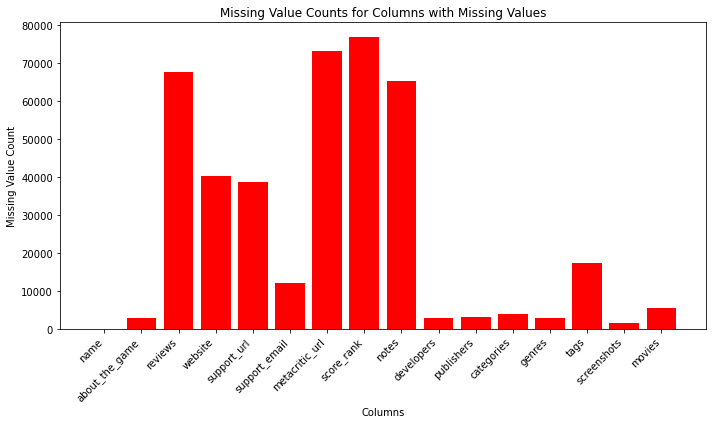

In [22]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_counts[missing_counts > 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for missing values
plt.bar(missing_columns.index, missing_columns.values, color='red')
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Counts for Columns with Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


wouldn´t that nice to see the numbers behind that?

In [23]:
# Calculate the total number of rows
total_rows = len(df)

# Calculate the count and percentage of missing values for each column
missing_values = df.isnull().sum()
non_missing_values = total_rows - missing_values
missing_percentage = (missing_values / total_rows) * 100

# Calculate the total values (missing + non-missing) for each column
total_values = missing_values + non_missing_values

# Create a DataFrame to display the missing value counts, non-missing counts, percentages, and total values
missing_info = pd.DataFrame({'Non-Missing Values': non_missing_values, 'Missing Values': missing_values, 'Percentage': missing_percentage, 'Total Values': total_values})
missing_info = missing_info[missing_info['Missing Values'] > 0]  # Select columns with missing values

print("Missing, Non-Missing, and Total Value Counts and Percentages:")
print(missing_info)


Missing, Non-Missing, and Total Value Counts and Percentages:
                Non-Missing Values  Missing Values  Percentage  Total Values
name                         76985               2    0.002598         76987
about_the_game               74070            2917    3.788951         76987
reviews                       9362           67625   87.839505         76987
website                      36679           40308   52.356891         76987
support_url                  38228           38759   50.344863         76987
support_email                64897           12090   15.703950         76987
metacritic_url                3792           73195   95.074493         76987
score_rank                      42           76945   99.945445         76987
notes                        11503           65484   85.058516         76987
developers                   74047            2940    3.818827         76987
publishers                   73811            3176    4.125372         76987
categories    

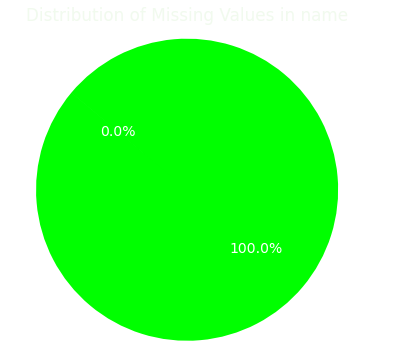

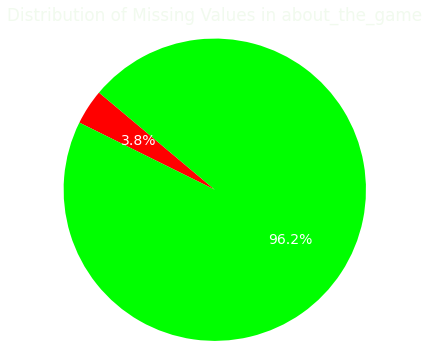

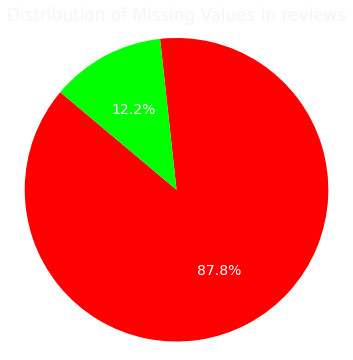

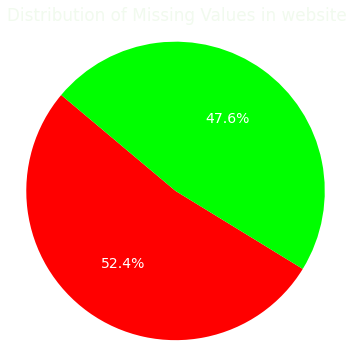

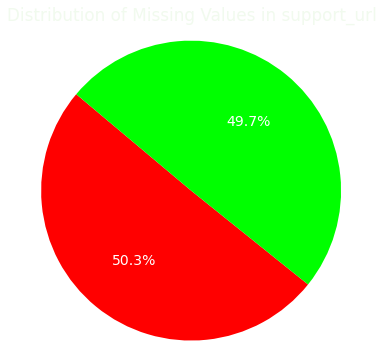

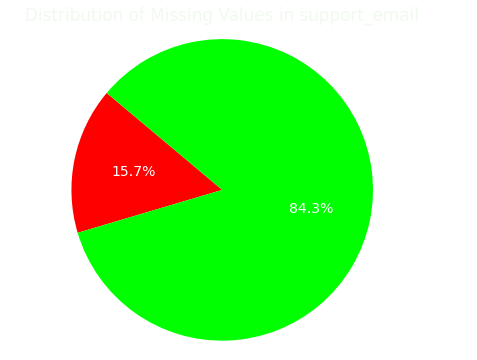

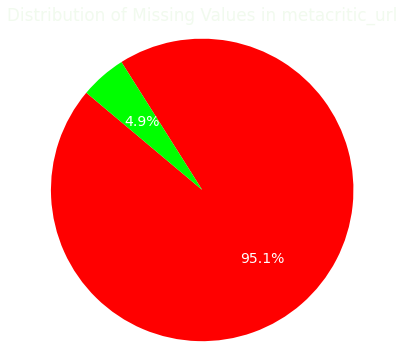

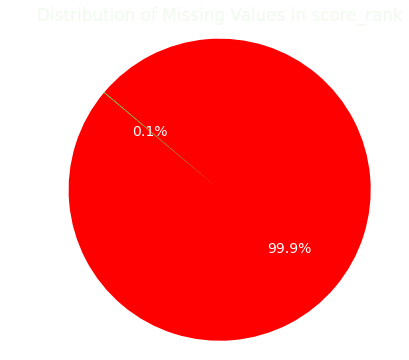

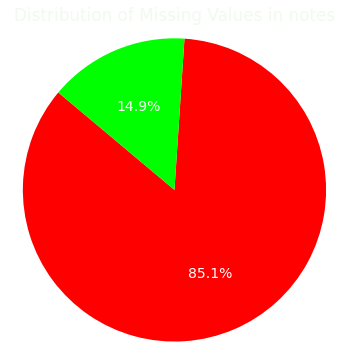

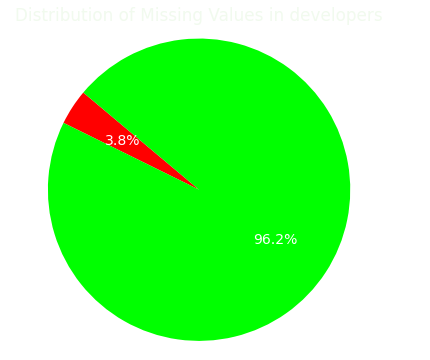

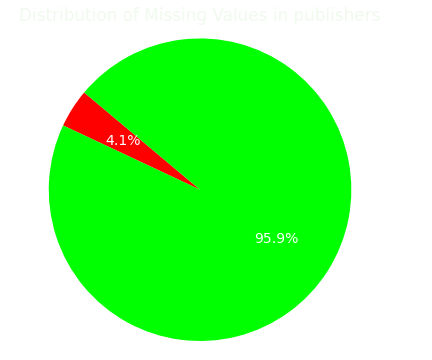

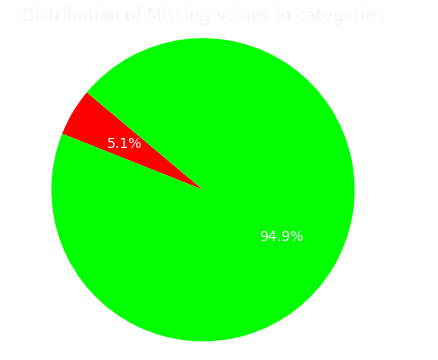

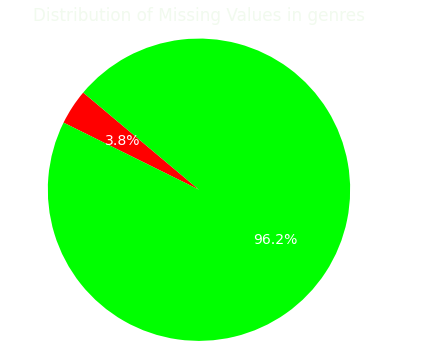

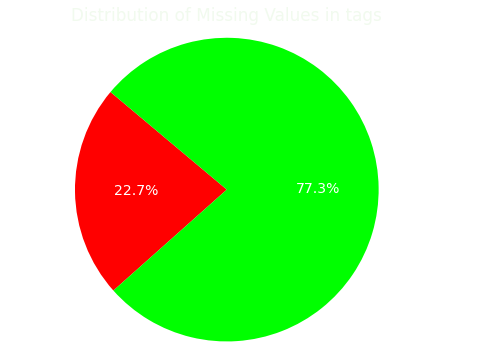

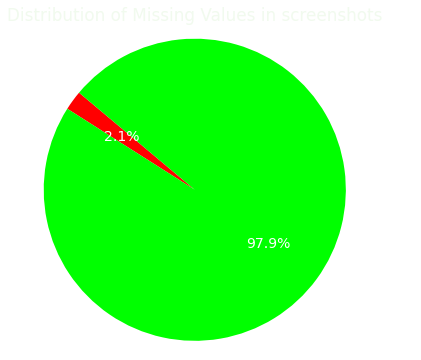

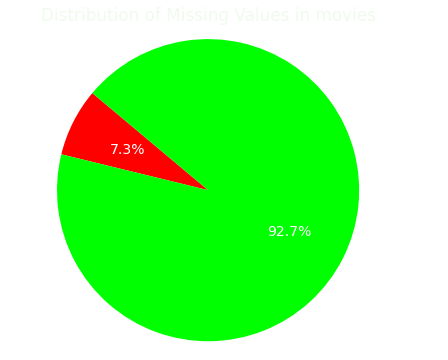

In [34]:
# Calculate the total number of rows
total_rows = len(df)

# Calculate the count of missing values for each column
missing_values = df.isnull().sum()

# Define custom colors for the pie chart segments
colors = ['#FF0000', '#00FF00']  # Red for missing, green for non-missing
title_color = '#F1FAEE'  # Replace with a contrasting title text color

# Set the font size and color for the labels
plt.rcParams['font.size'] = 14
plt.rcParams['text.color'] = 'white'  # Black color for labels

# Create separate pie charts with custom colors for columns with missing values
for column, count in missing_values.items():
    if count > 0:
        plt.figure(figsize=(6, 6))
        plt.pie([count, total_rows - count], labels=['Missing', 'Non-Missing'], autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f'Distribution of Missing Values in {column}', color=title_color)  # Black title text
        plt.axis('equal')
        plt.gca().set_facecolor('white')  # White background
        plt.show()